In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt

In [2]:
#create file and read in csv 
file_path = "mxmh_survey_results.csv"
mental_health_data_df = pd.read_csv(file_path)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
mental_health_data_df['Primary streaming service'].fillna(value='N/A', inplace=True)
mental_health_data_df['BPM'].fillna(value='-1', inplace=True)
mental_health_data_df['Music effects'].fillna(value='N/A', inplace=True)
mental_health_data_df['While working'].fillna(value='N/A', inplace=True)
del mental_health_data_df['Instrumentalist']
del mental_health_data_df['Foreign languages']
del mental_health_data_df['Composer']

In [4]:
mental_health_data_df = mental_health_data_df.dropna(how='any')
mental_health_data_df.count()

Timestamp                       735
Age                             735
Primary streaming service       735
Hours per day                   735
While working                   735
Fav genre                       735
Exploratory                     735
BPM                             735
Frequency [Classical]           735
Frequency [Country]             735
Frequency [EDM]                 735
Frequency [Folk]                735
Frequency [Gospel]              735
Frequency [Hip hop]             735
Frequency [Jazz]                735
Frequency [K pop]               735
Frequency [Latin]               735
Frequency [Lofi]                735
Frequency [Metal]               735
Frequency [Pop]                 735
Frequency [R&B]                 735
Frequency [Rap]                 735
Frequency [Rock]                735
Frequency [Video game music]    735
Anxiety                         735
Depression                      735
Insomnia                        735
OCD                         

In [5]:
# Adding a column of comCombined Mental Health Diagnosis Scale
mental_health_data_df["Combined Scale"] = mental_health_data_df["Anxiety"]+mental_health_data_df["Depression"]+mental_health_data_df["Insomnia"]+mental_health_data_df["OCD"]
mental_health_data_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Combined Scale
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156,Rarely,Never,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,I understand.,4.0
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,Rock,Yes,119,Sometimes,Never,...,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,N/A,I understand.,12.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132,Never,Never,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,Jazz,Yes,84,Sometimes,Never,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107,Never,Never,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Rock,Yes,120,Very frequently,Rarely,...,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.,22.0
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Pop,Yes,160,Rarely,Rarely,...,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,12.0
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,Rap,Yes,120,Rarely,Sometimes,...,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,8.0
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Classical,No,170,Very frequently,Never,...,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,8.0


## Data Cleaning

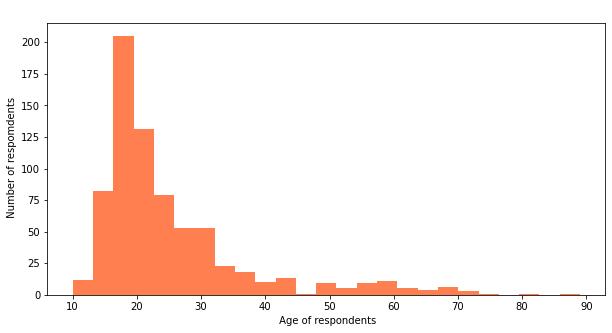

In [6]:
respodents_age_count = mental_health_data_df.hist(['Age'], bins = 25, color ='coral', grid=False, figsize = (10, 5), label = None)
plt.xlabel(" Age of respondents")
plt.ylabel(" Number of respomdents")
plt.title (" ")
plt.show()


In [7]:
#Reducing the dataframe for age group 10 - 39
Reduced_mental_health_data_df= pd.DataFrame(mental_health_data_df.loc[mental_health_data_df["Age"]<40,:])

# Creating the bins for age group
bins = [10,19,29,39]
age_groups = ["Teenage(10-19)", "Young adults(20-29)", "Adults(30-39)"]

# Slice the data and place it into bins
Reduced_mental_health_data_df["Age groups"] = pd.cut(Reduced_mental_health_data_df["Age"], bins,labels=age_groups, include_lowest=True)
Reduced_mental_health_data_df["Age groups"].value_counts()

Teenage(10-19)         299
Young adults(20-29)    276
Adults(30-39)           82
Name: Age groups, dtype: int64

## Age vs. Hours of listening of music 


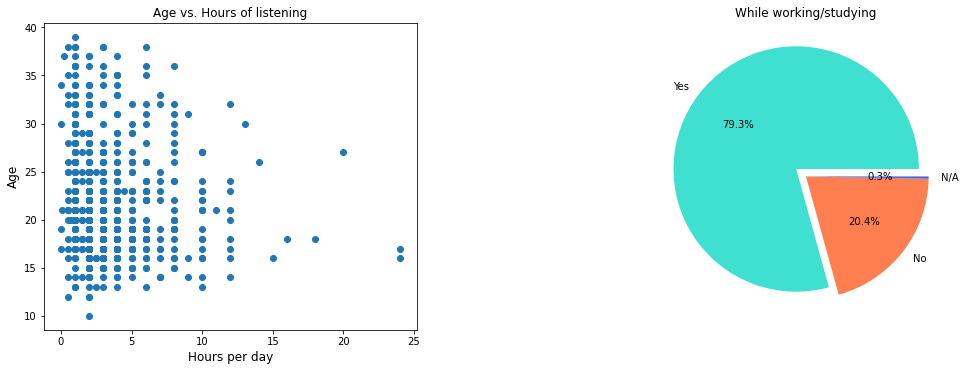

In [8]:
x = Reduced_mental_health_data_df["Hours per day"]
y = Reduced_mental_health_data_df["Age"]
z= Reduced_mental_health_data_df["While working"].value_counts()

fig,(ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(w_pad =5)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.scatter(x,y)
ax1.set_xlabel('Hours per day', fontsize =12)
ax1.set_ylabel('Age', fontsize =12)
ax1.set_title('Age vs. Hours of listening', fontsize =12)

labels=Reduced_mental_health_data_df["While working"].unique()
ax2.pie(z, labels = labels, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('While working/studying')
plt.show()


## Primary streaming services by Age group

The next study was to understand what is the most prefered streming service used by each segment and our analysis clearly indicates that Spotify is the most prefered choice across the segment and next best choice is Youtube. Apple Music features amongst the Adults only as its a paid service whereas the other two also have a free service.

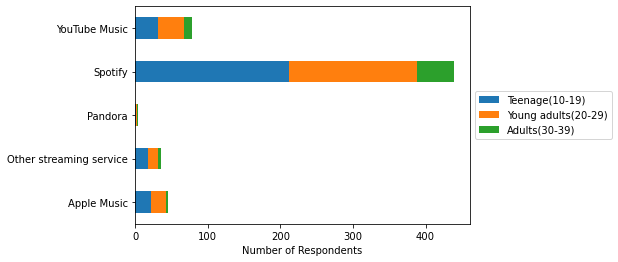

In [55]:
Teenage_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Age groups"] == "Teenage(10-19)" ,:])
Primary_streaming_services_teenage =Teenage_df["Primary streaming service"].value_counts()

Young_adults_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Age groups"] == "Young adults(20-29)" ,:])
Primary_streaming_services_young_adults =Young_adults_df["Primary streaming service"].value_counts()

Adults_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Age groups"] == "Adults(30-39)" ,:])
Primary_streaming_services_adults =Adults_df["Primary streaming service"].value_counts()

Primary_streaming_services_df = pd.DataFrame({
    "Teenage(10-19)": Primary_streaming_services_teenage,
    "Young adults(20-29)": Primary_streaming_services_young_adults,
    "Adults(30-39)": Primary_streaming_services_adults})

Primary_streaming_services_df_updated = Primary_streaming_services_df.drop(['I do not use a streaming service.','N/A'])


ax = Primary_streaming_services_df_updated.plot.barh(stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("")
ax.set_xlabel("Number of Respondents")
plt.savefig('Primary_Streaming_services.png')
plt.show()



## Fav genre by Age group

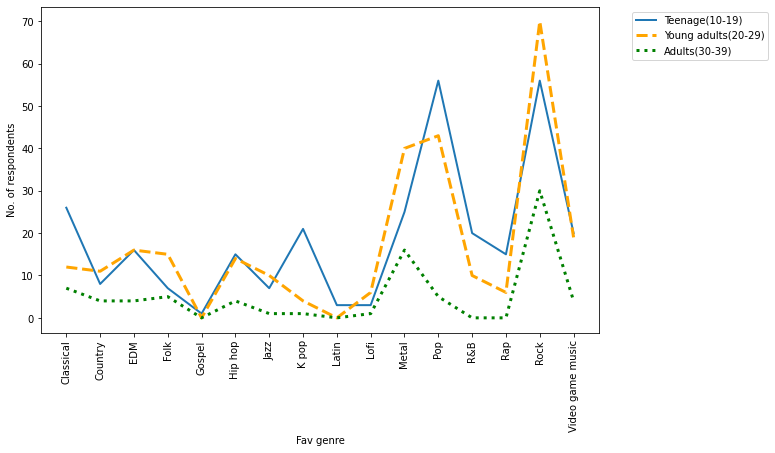

In [56]:
Teenage_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Age groups"] == "Teenage(10-19)" ,:])
Fav_genre_teenage =Teenage_df["Fav genre"].value_counts()

Young_adults_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Age groups"] == "Young adults(20-29)" ,:])
Fav_genre_young_adults =Young_adults_df["Fav genre"].value_counts()

Adults_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Age groups"] == "Adults(30-39)" ,:])
Fav_genre_adults =Adults_df["Fav genre"].value_counts()

Fav_genre_df = pd.DataFrame({
    "Teenage(10-19)": Fav_genre_teenage,
    "Young adults(20-29)": Fav_genre_young_adults,
    "Adults(30-39)": Fav_genre_adults})

Fav_genre_df['Teenage(10-19)'].fillna(value=0, inplace=True)
Fav_genre_df['Young adults(20-29)'].fillna(value=0, inplace=True)
Fav_genre_df['Adults(30-39)'].fillna(value=0, inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(Fav_genre_df['Teenage(10-19)'], color="tab:blue", linewidth=2, label = "Teenage(10-19)" )
plt.plot(Fav_genre_df['Young adults(20-29)'], linestyle = '--', color="orange", linewidth=3 ,label = "Young adults(20-29)")
plt.plot(Fav_genre_df['Adults(30-39)'], linestyle = 'dotted',  color="green", linewidth=3, label = "Adults(30-39)")
plt.xlabel("Fav genre")
plt.ylabel("No. of respondents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.savefig("Fav_genre_by_Age_group")
plt.show()

## Combined Mental Health Diagnosis Scale


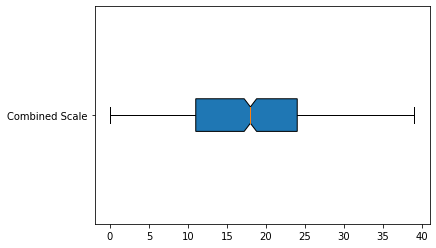

In [64]:
Combined_MH_rankings = Reduced_mental_health_data_df["Combined Scale"]
fig1, ax1 = plt.subplots()
ax1.boxplot(Combined_MH_rankings ,notch =True, vert = False, patch_artist = True, labels = ["Combined Scale"])

plt.savefig("Combined_Score")
plt.show()



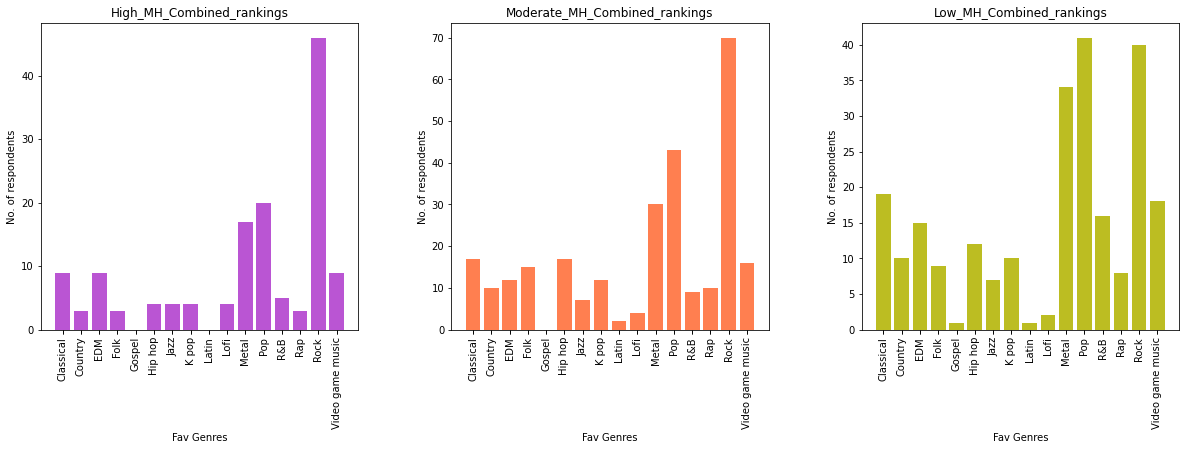

In [58]:
High_MH_rankings_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Combined Scale"] >=25 ,:])
Fav_genre_High_MH =High_MH_rankings_df["Fav genre"].value_counts()

Moderate_MH_rankings_df= pd.DataFrame(Reduced_mental_health_data_df.loc[(Reduced_mental_health_data_df["Combined Scale"] <25)&(Reduced_mental_health_data_df["Combined Scale"] >=15) ,:])
Fav_genre_Mod_MH =Moderate_MH_rankings_df["Fav genre"].value_counts()

Low_MH_rankings_df= pd.DataFrame(Reduced_mental_health_data_df.loc[Reduced_mental_health_data_df["Combined Scale"] <15 ,:])
Fav_genre_Low_MH =Low_MH_rankings_df["Fav genre"].value_counts()

Fav_genre_MH_df = pd.DataFrame({
    "High_MH_rankings": Fav_genre_High_MH,
    "Moderate_MH_rankings": Fav_genre_Mod_MH,
    "Low_MH_rankings": Fav_genre_Low_MH})

Fav_genre_MH_df['High_MH_rankings'].fillna(value=0, inplace=True)
Fav_genre_MH_df['Moderate_MH_rankings'].fillna(value=0, inplace=True)
Fav_genre_MH_df['Low_MH_rankings'].fillna(value=0, inplace=True)



fig,(ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(w_pad =0)
fig.set_figheight(5)
fig.set_figwidth(18)



x_axis = np.arange(len(Reduced_mental_health_data_df["Fav genre"].unique()))
tick_locations=[value for value in x_axis]

for x in x_axis:
    tick_locations.append(x)

y0 = Fav_genre_MH_df["High_MH_rankings"]
y1 = Fav_genre_MH_df["Moderate_MH_rankings"]
y2 = Fav_genre_MH_df["Low_MH_rankings"]

xticklabels= Reduced_mental_health_data_df["Fav genre"].unique()
xticklabels.sort()

ax1.bar(x_axis, y0, color ='mediumorchid')
ax1.set_xlabel( "Fav Genres")
ax1.set_ylabel( "No. of respondents")
ax1.set_title ("High_MH_Combined_rankings" )
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(xticklabels, rotation = "vertical")

ax2.bar(x_axis, y1, color ='coral')
ax2.set_xlabel( "Fav Genres")
ax2.set_ylabel( "No. of respondents")
ax2.set_title ("Moderate_MH_Combined_rankings" )
ax2.set_xticks(tick_locations)
ax2.set_xticklabels(xticklabels, rotation = "vertical")

ax3.bar(x_axis, y2, color ='tab:olive')
ax3.set_xlabel( "Fav Genres")
ax3.set_ylabel( "No. of respondents")
ax3.set_title ("Low_MH_Combined_rankings" )
ax3.set_xticks(tick_locations)
ax3.set_xticklabels(xticklabels, rotation = "vertical")

plt.savefig("Fav_genere_combined_rankings")

plt.show()


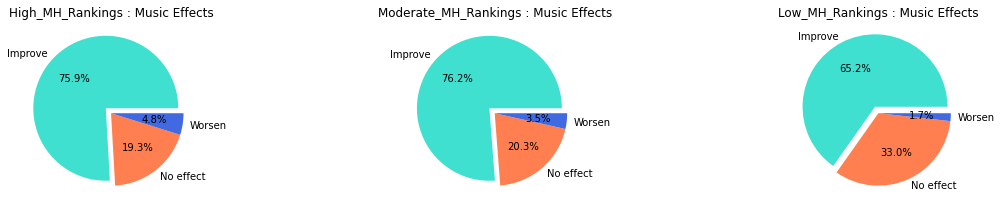

In [59]:
High_ME_rankings_df= pd.DataFrame(High_MH_rankings_df.loc[(High_MH_rankings_df["Fav genre"] == "Rock")|(High_MH_rankings_df["Fav genre"] == "Pop")|(High_MH_rankings_df["Fav genre"] == "Metal") ,:])
Music_Effects_High_ME =High_ME_rankings_df["Music effects"].value_counts()

Moderate_ME_rankings_df= pd.DataFrame(Moderate_MH_rankings_df.loc[(Moderate_MH_rankings_df["Fav genre"] == "Rock")|(Moderate_MH_rankings_df["Fav genre"] == "Pop")|(Moderate_MH_rankings_df["Fav genre"] == "Metal") ,:])
Music_Effects_Moderate_ME =Moderate_ME_rankings_df["Music effects"].value_counts()

Low_ME_rankings_df= pd.DataFrame(Low_MH_rankings_df.loc[(Low_MH_rankings_df["Fav genre"] == "Rock")|(Low_MH_rankings_df["Fav genre"] == "Pop")|(Low_MH_rankings_df["Fav genre"] == "Metal") ,:])
Music_Effects_Low_ME =Low_ME_rankings_df["Music effects"].value_counts()

x = Music_Effects_High_ME
y = Music_Effects_Moderate_ME
z= Music_Effects_Low_ME

fig,(ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(w_pad =5)
fig.set_figheight(10)
fig.set_figwidth(15)

labels1=High_ME_rankings_df["Music effects"].unique()
labels1.sort()
ax1.pie(x, labels = labels1, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax1.title.set_text('High_MH_Rankings : Music Effects')


labels2=Moderate_ME_rankings_df["Music effects"].unique()
labels2.sort()
ax2.pie(y, labels = labels2, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('Moderate_MH_Rankings : Music Effects')


labels3=Low_ME_rankings_df["Music effects"].unique()
labels3.sort()
ax3.pie(z, labels = labels3, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax3.title.set_text('Low_MH_Rankings : Music Effects')

plt.savefig("Music_Effects")

plt.show()
